# 1. Notebook Setup

Import libraries

In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Python-libraries
# import datetime
# import joblib
# import math
# import os
# import pickle
# import sys
# import time
# import warnings
# import dateutil

# Third-party libraries
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

# Python modules
import eda as eda

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Setup Notebook

# 2. Primary Data Loading

## a. Irrandiance data

one-minute GHI, DNI and DHI data

In [4]:
df_irradiance = pd.read_csv("../data/Folsom_irradiance.csv", infer_datetime_format=True)

df_irradiance

,timeStamp,ghi,dni,dhi
0,2014-01-02 08:00:00,0.0,0.0,0.0
1,2014-01-02 08:01:00,0.0,0.0,0.0
2,2014-01-02 08:02:00,0.0,0.0,0.0
3,2014-01-02 08:03:00,0.0,0.0,0.0
4,2014-01-02 08:04:00,0.0,0.0,0.0
...,...,...,...,...
1552315,2016-12-31 07:55:00,0.0,0.0,0.0
1552316,2016-12-31 07:56:00,0.0,0.0,0.0
1552317,2016-12-31 07:57:00,0.0,0.0,0.0
1552318,2016-12-31 07:58:00,0.0,0.0,0.0


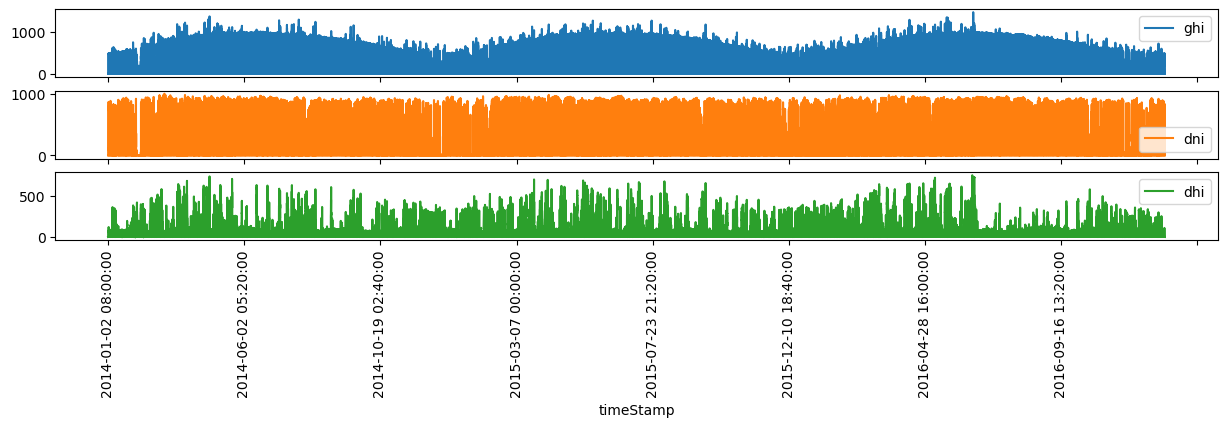

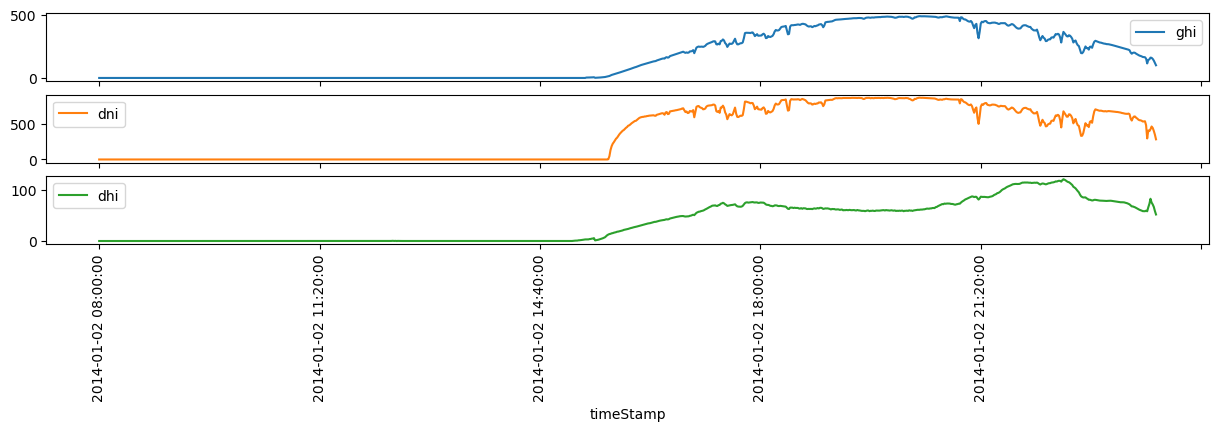

In [79]:
plot_cols = ["ghi", "dni", "dhi"]
eda.plot_time_series(df=df_irradiance, time_col="timeStamp", plot_cols=plot_cols)
eda.plot_time_series(df=df_irradiance[:960], time_col="timeStamp", plot_cols=plot_cols)

In [53]:
df_irradiance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ghi,1552320.0,208.544450,295.330043,0.0,0.0,3.2300,386.90,1466.0
dni,1552320.0,259.864757,363.156866,0.0,0.0,0.0000,662.80,1004.0
dhi,1551702.0,54.267355,84.322369,0.0,0.0,3.7955,79.56,748.1


## b. Weather data

In [41]:
df_weather = pd.read_csv("../data/Folsom_weather.csv", infer_datetime_format=True)
df_weather

,timeStamp,air_temp,relhum,press,windsp,winddir,max_windsp,precipitation
0,2014-01-02 08:00:00,7.32,56.56,1010.0,1.80,43.61,3.7,0.0
1,2014-01-02 08:01:00,7.26,56.82,1010.0,2.00,48.40,3.1,0.0
2,2014-01-02 08:02:00,7.20,56.96,1010.0,1.90,31.80,3.7,0.0
3,2014-01-02 08:03:00,7.14,57.12,1010.0,1.44,38.98,2.5,0.0
4,2014-01-02 08:04:00,7.08,57.36,1010.0,1.84,34.21,2.8,0.0
...,...,...,...,...,...,...,...,...
1552315,2016-12-31 07:55:00,7.60,85.60,1001.0,1.28,237.10,2.2,0.0
1552316,2016-12-31 07:56:00,7.60,85.80,1000.0,3.46,171.20,6.8,0.0
1552317,2016-12-31 07:57:00,7.70,86.10,1001.0,1.38,213.20,2.8,0.0
1552318,2016-12-31 07:58:00,7.70,86.10,1001.0,1.44,168.50,2.4,0.0


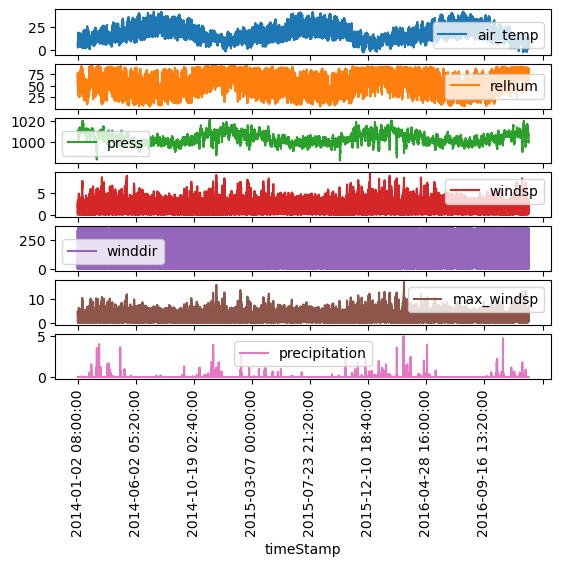

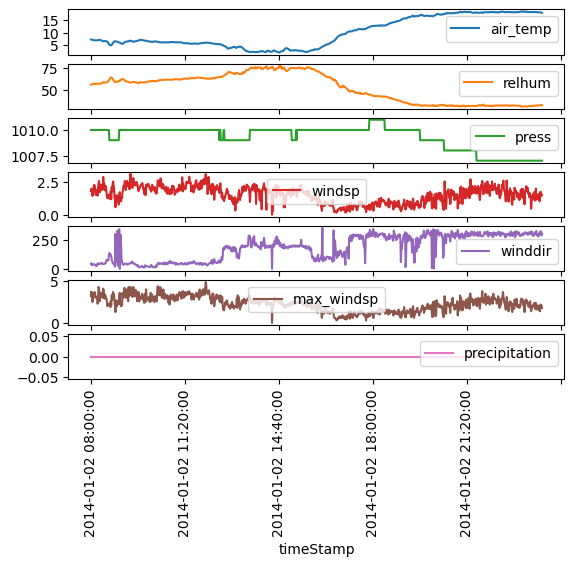

In [55]:
plot_cols=["air_temp", "relhum", "press", "windsp", "winddir", "max_windsp", "precipitation"]
eda.plot_time_series(df=df_weather, time_col="timeStamp", plot_cols=plot_cols)
eda.plot_time_series(df=df_weather[:960], time_col="timeStamp", plot_cols=plot_cols)

In [43]:
df_weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
air_temp,1551702.0,17.474522,8.237586,-3.30,11.40,16.12,22.70,42.78
relhum,1551702.0,54.575406,22.409471,4.86,35.66,55.06,74.36,94.00
press,1551702.0,1003.679582,5.038982,983.00,1000.00,1003.00,1007.00,1021.00
windsp,1551702.0,1.335163,0.829905,0.00,0.74,1.18,1.72,9.30
winddir,1551702.0,182.072540,83.149053,0.00,121.40,166.20,259.90,360.00
max_windsp,1551702.0,2.141872,1.251351,0.00,1.20,1.90,2.70,16.80
precipitation,1551702.0,0.002721,0.036820,0.00,0.00,0.00,0.00,5.04


Text(0, 0.5, 'Wind Velocity (ms^-1)')

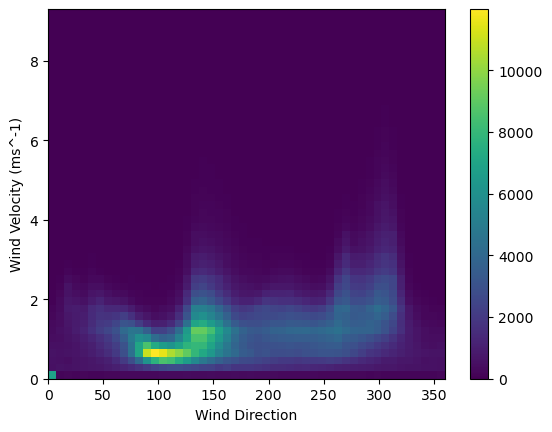

In [61]:
plt.hist2d(df_weather["winddir"].dropna(), df_weather["windsp"].dropna(), bins=(50, 50))
plt.colorbar()
plt.xlabel('Wind Direction')
plt.ylabel('Wind Velocity (ms^-1)')

# 3. Secondary Data Loading

## a. Sky Image Features

In [64]:
df_sky_img_features = pd.read_csv("../data/Folsom_sky_image_features.csv", infer_datetime_format=True)
df_sky_img_features

,timestamp,AVG(R),STD(R),ENT(R),AVG(G),STD(G),ENT(G),AVG(B),STD(B),ENT(B),AVG(RB),STD(RB),ENT(RB),AVG(NRB),STD(NRB),ENT(NRB)
0,2014-01-01 00:00:11,102.8933,45.8083,5.6373,121.5468,39.5426,5.6390,133.4322,30.8409,5.4275,0.7457,0.1647,4.8206,-0.1554,0.1033,4.2279
1,2014-01-01 00:01:10,109.1193,44.9516,5.6762,128.0568,38.7453,5.6535,139.4049,30.2546,5.4146,0.7601,0.1547,4.7120,-0.1447,0.0953,4.0961
2,2014-01-01 00:02:10,118.4310,44.4158,5.6386,129.2313,39.1756,5.6381,134.9957,30.8004,5.4368,0.8591,0.1453,4.7299,-0.0822,0.0821,3.9662
3,2014-01-01 00:03:11,108.0799,46.3934,5.6447,129.5778,39.5050,5.6392,142.6288,30.9485,5.4369,0.7347,0.1625,4.8007,-0.1626,0.1034,4.2324
4,2014-01-01 00:04:11,106.7813,45.5549,5.6539,126.3533,39.0664,5.6438,137.2983,30.4596,5.4168,0.7541,0.1613,4.7906,-0.1494,0.1003,4.1823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775911,2016-12-31 23:55:59,119.0850,58.5266,6.1185,120.1349,55.4199,6.0586,121.2516,46.8522,5.8533,0.9560,0.1625,4.8787,-0.0299,0.0901,4.0444
775912,2016-12-31 23:57:00,118.1933,59.0074,6.0942,119.7764,55.4268,6.0228,119.8126,46.1397,5.8002,0.9598,0.1788,5.0047,-0.0295,0.0987,4.1621
775913,2016-12-31 23:57:59,117.1289,59.2942,6.0814,119.1408,55.3043,6.0002,120.5959,45.5852,5.7543,0.9429,0.1899,5.0979,-0.0398,0.1066,4.2562
775914,2016-12-31 23:58:59,110.1486,61.0436,6.0823,116.9210,55.7548,6.0016,124.4827,45.2933,5.7811,0.8445,0.2123,5.1260,-0.0995,0.1323,4.4107


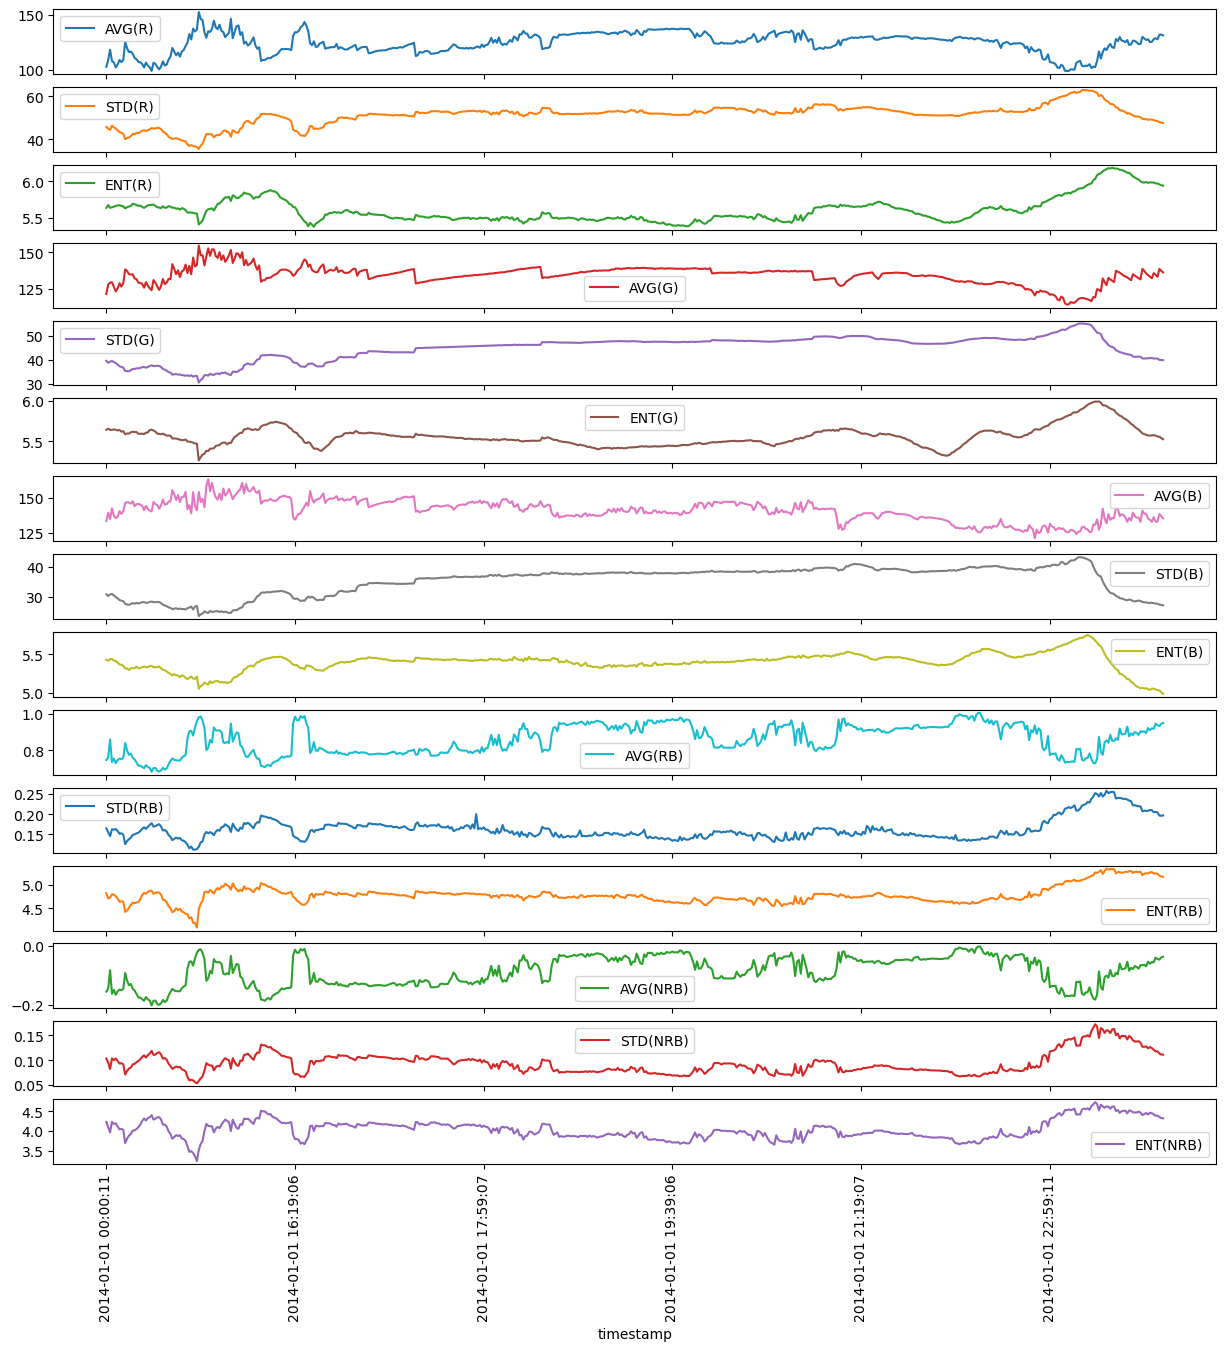

In [81]:
plot_cols = list(df_sky_img_features.columns.values)
plot_cols.remove("timestamp")
eda.plot_time_series(df=df_sky_img_features, time_col="timestamp", plot_cols=plot_cols)
eda.plot_time_series(df=df_sky_img_features[:561], time_col="timestamp", plot_cols=plot_cols) # 561 gotten from df_sky_img_features[df_sky_img_features["timestamp"].str.contains("2014-01-01")]

In [82]:
df_sky_img_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AVG(R),775916.0,137.707012,12.999919,64.8146,129.155500,139.57475,146.6885,189.9817
STD(R),775916.0,47.618662,6.828796,17.9875,43.600375,47.18580,51.0745,86.4515
ENT(R),775916.0,5.802955,0.214288,3.8204,5.652300,5.76540,5.9360,6.4730
AVG(G),775916.0,141.824441,10.191951,80.3541,134.654700,142.77300,148.6527,189.9817
STD(G),775916.0,43.323574,6.213200,15.8369,39.400200,43.15625,46.8583,77.6339
ENT(G),775916.0,5.692493,0.206817,3.7129,5.553200,5.64470,5.8111,6.4705
AVG(B),775916.0,147.171596,9.908800,89.4902,140.709000,147.63195,153.6714,200.0786
STD(B),775916.0,36.249612,5.722567,14.1308,32.618000,36.22760,39.8534,83.5272
ENT(B),775916.0,5.476716,0.223504,3.6387,5.338100,5.44980,5.5920,6.4395
AVG(RB),775916.0,0.919222,0.081037,0.4254,0.883300,0.94100,0.9712,2.1663


## b. Satellite Features

In [9]:
df_satellite_features = pd.read_csv("../data/Folsom_satellite.csv", infer_datetime_format=True)
df_satellite_features

,2014-03-13 18:00:00,77,76,77.1,77.2,84,82,79,76.1,74,...,77.7,76.18,75.9,74.6,76.19,76.20,76.21,77.8,77.9,78.11
0,2014-03-13 18:45:00,79,77,76,75,89,79,76,74,67,...,81,82,80,76,79,78,77,76,77,78
1,2014-03-13 19:00:00,81,80,79,78,86,81,83,80,68,...,78,79,78,76,79,79,79,79,80,81
2,2014-03-13 19:15:00,81,80,79,79,89,76,80,83,72,...,80,79,75,80,83,82,81,80,80,81
3,2014-03-13 19:30:00,82,81,80,79,87,90,77,86,70,...,81,81,79,77,81,81,81,81,82,83
4,2014-03-13 19:41:00,83,82,81,81,90,78,83,86,74,...,80,81,80,79,83,83,83,83,83,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43055,2016-12-31 21:00:00,146,151,156,160,164,163,161,160,159,...,162,165,167,166,164,162,160,159,160,163
43056,2016-12-31 21:45:00,107,119,123,121,122,136,150,153,149,...,108,114,118,121,127,137,153,141,136,139
43057,2016-12-31 22:15:00,121,124,121,142,143,145,144,141,142,...,111,115,118,116,136,136,152,164,153,143
43058,2016-12-31 23:15:00,105,120,119,107,120,112,110,122,137,...,120,117,110,112,118,127,136,142,144,145


## c. Irradiance Features

In [10]:
df_irradiance_features = pd.read_csv("../data/Irradiance_features_intra-hour.csv", infer_datetime_format=True)
df_irradiance_features

,timestamp,B(ghi_kt|5min),B(ghi_kt|10min),B(ghi_kt|15min),B(ghi_kt|20min),B(ghi_kt|25min),B(ghi_kt|30min),B(dni_kt|5min),B(dni_kt|10min),B(dni_kt|15min),...,L(ghi_kt|15min),L(ghi_kt|20min),L(ghi_kt|25min),L(ghi_kt|30min),L(dni_kt|5min),L(dni_kt|10min),L(dni_kt|15min),L(dni_kt|20min),L(dni_kt|25min),L(dni_kt|30min)
0,2014-01-02 16:00:00,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,...,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000
1,2014-01-02 16:05:00,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,...,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000
2,2014-01-02 16:10:00,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,...,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000
3,2014-01-02 16:15:00,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,...,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000
4,2014-01-02 16:20:00,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,...,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144120,2016-12-30 23:55:00,1.200000,1.200000,1.198531,1.190875,1.182972,1.175780,1.082577,1.075745,1.069314,...,1.195594,1.167908,1.151359,1.139817,1.082577,1.068914,1.056452,1.032740,1.027801,1.026945
144121,2016-12-31 00:00:00,1.200000,1.200000,1.200000,1.198898,1.192700,1.185810,1.154725,1.118651,1.102072,...,1.200000,1.195594,1.167908,1.151359,1.154725,1.082577,1.068914,1.056452,1.032740,1.027801
144122,2016-12-31 00:05:00,1.200000,1.200000,1.200000,1.200000,1.199119,1.193917,1.192924,1.173825,1.143409,...,1.200000,1.200000,1.195594,1.167908,1.192924,1.154725,1.082577,1.068914,1.056452,1.032740
144123,2016-12-31 00:10:00,1.150846,1.175423,1.183615,1.187712,1.190169,1.191073,0.802914,0.997919,1.050188,...,1.200000,1.200000,1.200000,1.195594,0.802914,1.192924,1.154725,1.082577,1.068914,1.056452


In [11]:
df_irradiance_features = pd.read_csv("../data/Irradiance_features_intra-day.csv", infer_datetime_format=True)
df_irradiance_features

,timestamp,B(ghi_kt|30min),B(ghi_kt|60min),B(ghi_kt|90min),B(ghi_kt|120min),B(ghi_kt|150min),B(ghi_kt|180min),B(dni_kt|30min),B(dni_kt|60min),B(dni_kt|90min),...,L(ghi_kt|90min),L(ghi_kt|120min),L(ghi_kt|150min),L(ghi_kt|180min),L(dni_kt|30min),L(dni_kt|60min),L(dni_kt|90min),L(dni_kt|120min),L(dni_kt|150min),L(dni_kt|180min)
0,2014-01-02 16:00:00,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,...,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000
1,2014-01-02 16:30:00,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,...,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000
2,2014-01-02 17:00:00,1.180150,1.190075,1.193383,1.195038,1.196030,1.196692,1.194297,1.197148,1.198099,...,1.200000,1.200000,1.200000,1.200000,1.194297,1.200000,1.200000,1.200000,1.200000,1.200000
3,2014-01-02 17:30:00,1.153181,1.166666,1.177777,1.183333,1.186666,1.188889,1.144028,1.169162,1.179442,...,1.200000,1.200000,1.200000,1.200000,1.144028,1.194297,1.200000,1.200000,1.200000,1.200000
4,2014-01-02 18:00:00,1.044205,1.098693,1.125845,1.144384,1.155507,1.162923,1.013608,1.078818,1.117311,...,1.180150,1.200000,1.200000,1.200000,1.013608,1.144028,1.194297,1.200000,1.200000,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24024,2016-12-30 22:00:00,1.032347,1.028933,1.028783,1.019422,0.992985,1.004530,0.963383,0.958305,0.958420,...,1.028482,0.991340,0.887240,1.062255,0.963383,0.953228,0.958648,0.938773,0.819187,1.056400
24025,2016-12-30 22:30:00,1.046703,1.039525,1.034856,1.033263,1.024878,1.001938,0.983809,0.973596,0.966807,...,1.025519,1.028482,0.991340,0.887240,0.983809,0.963383,0.953228,0.958648,0.938773,0.819187
24026,2016-12-30 23:00:00,1.069146,1.057925,1.049399,1.043429,1.040439,1.032256,1.007822,0.995815,0.985005,...,1.032347,1.025519,1.028482,0.991340,1.007822,0.983809,0.963383,0.953228,0.958648,0.938773
24027,2016-12-30 23:30:00,1.114559,1.091853,1.076803,1.065689,1.057655,1.052793,1.024049,1.015935,1.005226,...,1.046703,1.032347,1.025519,1.028482,1.024049,1.007822,0.983809,0.963383,0.953228,0.958648


In [14]:
df_irradiance_features = pd.read_csv("../data/Irradiance_features_day-ahead.csv", infer_datetime_format=True)
df_irradiance_features

,timestamp,B(ghi_kt|8h),B(ghi_kt|9h),B(ghi_kt|10h),B(ghi_kt|11h),B(ghi_kt|12h),B(ghi_kt|13h),B(ghi_kt|14h),B(ghi_kt|15h),B(ghi_kt|16h),...,L(dni_kt|10h),L(dni_kt|11h),L(dni_kt|12h),L(dni_kt|13h),L(dni_kt|14h),L(dni_kt|15h),L(dni_kt|16h),L(dni_kt|17h),L(dni_kt|18h),L(dni_kt|19h)
0,2014-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03 12:00:00,1.2,1.2,1.2,1.166205,1.171573,1.149115,1.135826,1.126372,1.118463,...,1.2,0.891756,1.137140,0.807847,0.957960,1.070286,1.085705,1.037964,1.078818,1.197148
2,2014-01-04 12:00:00,1.2,1.2,1.2,1.194557,1.192873,1.177134,1.160482,1.146232,1.135274,...,1.2,1.126389,1.176411,1.095242,1.074085,1.071009,1.087085,1.116716,1.180534,1.200000
3,2014-01-05 12:00:00,1.2,1.2,1.2,1.198331,1.198570,1.189132,1.176615,1.164570,1.154680,...,1.2,1.138689,1.199334,1.147099,1.115926,1.095796,1.104166,1.124700,1.179385,1.200000
4,2014-01-06 12:00:00,1.2,1.2,1.2,1.199024,1.196491,1.179060,1.161791,1.148027,1.137142,...,1.2,1.128022,1.124230,1.013737,0.995145,1.000701,1.012249,1.039388,1.093181,1.195288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2016-12-26 12:00:00,1.2,1.2,1.2,1.200000,1.146593,1.150281,1.139395,1.092188,1.062053,...,1.2,1.072263,0.183355,0.897829,0.885869,0.459594,0.510352,0.150339,0.378694,0.000000
1090,2016-12-27 12:00:00,1.2,1.2,1.2,1.200000,1.194367,1.181540,1.169454,1.159122,1.151615,...,1.2,0.948154,0.728262,1.032941,1.103456,1.102983,1.104990,1.101640,1.163766,1.129972
1091,2016-12-28 12:00:00,1.2,1.2,1.2,1.168792,1.112367,1.063583,1.050487,1.029079,1.039820,...,1.2,0.939433,0.649573,0.450245,0.782662,0.641750,1.021802,0.913188,1.010341,0.868337
1092,2016-12-29 12:00:00,1.2,1.2,1.2,1.192510,1.193430,1.181926,1.167291,1.154293,1.144569,...,1.2,1.124760,1.200000,1.182081,1.130652,1.112429,1.120122,1.168935,1.199683,1.200000


## d. NAM

In [16]:
df_nam = pd.read_csv("../data/NAM_nearest_node_day-ahead.csv", infer_datetime_format=True)
df_nam

,timestamp,nam_ghi_26h,nam_ghi_27h,nam_ghi_28h,nam_ghi_29h,nam_ghi_30h,nam_ghi_31h,nam_ghi_32h,nam_ghi_33h,nam_ghi_34h,...,nam_cc_31h,nam_cc_32h,nam_cc_33h,nam_cc_34h,nam_cc_35h,nam_cc_36h,nam_cc_37h,nam_cc_38h,nam_cc_39h,nam_cc_40h
0,2014-01-02 12:00:00,0.0,0.0,99.625,274.750,416.375,510.875,547.375,527.500,454.625,...,8.0,20.0,18.0,12.0,8.0,20.0,21.333333,22.666667,24.0,24.666667
1,2014-01-03 12:00:00,0.0,0.0,96.000,270.250,411.875,508.875,547.625,527.125,450.375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,2014-01-04 12:00:00,0.0,0.0,107.250,281.625,428.125,525.000,563.875,541.875,462.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,15.333333
3,2014-01-05 12:00:00,0.0,0.0,91.875,277.125,418.625,509.375,524.875,537.750,310.500,...,84.0,98.0,74.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.000000
4,2014-01-06 12:00:00,0.0,0.0,105.000,286.000,429.500,518.250,557.250,543.000,469.125,...,0.0,0.0,34.0,40.0,20.0,2.0,1.333333,0.666667,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2016-12-26 12:00:00,0.0,0.0,75.625,232.750,365.125,453.625,484.875,453.750,366.750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
1090,2016-12-27 12:00:00,0.0,0.0,74.500,232.375,367.125,455.375,486.750,457.375,371.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
1091,2016-12-28 12:00:00,0.0,0.0,73.875,229.625,361.875,449.875,482.375,454.625,371.375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,22.666667
1092,2016-12-29 12:00:00,0.0,0.0,71.125,228.125,361.250,449.625,481.125,453.875,370.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000


# 4. Target Loading

In [20]:
df_target_intrahour = pd.read_csv("../data/Target_intra-hour.csv", infer_datetime_format=True)
df_target_intrahour

,timestamp,ghi_5min,dni_5min,ghi_clear_5min,dni_clear_5min,ghi_kt_5min,dni_kt_5min,elevation_5min,ghi_10min,dni_10min,...,ghi_kt_25min,dni_kt_25min,elevation_25min,ghi_30min,dni_30min,ghi_clear_30min,dni_clear_30min,ghi_kt_30min,dni_kt_30min,elevation_30min
0,2014-01-02 16:00:00,74.342,507.160,45.481545,236.113747,1.200000,1.200000,5.821237,89.860,559.840,...,1.200000,1.200000,8.927891,143.860,639.280,107.442565,418.638252,1.2,1.2,9.681759
1,2014-01-02 16:05:00,89.860,559.840,56.989441,277.436445,1.200000,1.200000,6.611024,105.300,599.620,...,1.200000,1.200000,9.681759,156.800,652.760,120.585989,447.786314,1.2,1.2,10.425939
2,2014-01-02 16:10:00,105.300,599.620,69.080774,316.517024,1.200000,1.200000,7.392244,118.220,614.020,...,1.200000,1.200000,10.425939,169.880,665.500,133.784150,474.715601,1.2,1.2,11.160135
3,2014-01-02 16:15:00,118.220,614.020,81.599285,353.096042,1.200000,1.200000,8.164625,129.880,619.940,...,1.200000,1.200000,11.160135,186.780,693.040,146.982563,499.592048,1.2,1.2,11.884044
4,2014-01-02 16:20:00,129.880,619.940,94.419980,387.116288,1.200000,1.200000,8.927891,143.860,639.280,...,1.200000,1.200000,11.884044,201.400,712.140,160.135837,522.580864,1.2,1.2,12.597357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144120,2016-12-30 23:55:00,109.300,401.520,79.738806,347.879668,1.200000,1.154725,8.051949,112.040,376.340,...,1.132514,0.798178,4.919444,32.594,24.764,23.905552,144.184703,1.2,1.2,4.115458
144121,2016-12-31 00:00:00,112.040,376.340,67.333420,311.112695,1.200000,1.192924,7.281865,79.014,221.200,...,1.200000,1.200000,4.115458,26.084,8.678,15.699923,102.362578,1.2,1.2,3.303639
144122,2016-12-31 00:05:00,79.014,221.200,55.366935,271.872783,1.150846,0.802914,6.502907,45.668,86.552,...,1.200000,1.200000,3.303639,22.898,3.130,9.111790,64.742781,1.2,1.2,2.484232
144123,2016-12-31 00:10:00,45.668,86.552,44.000729,230.459876,1.040714,0.375700,5.715346,39.322,53.528,...,1.200000,1.200000,2.484232,13.232,0.000,4.378988,34.538974,1.2,1.2,1.657475


In [19]:
df_target_intraday = pd.read_csv("../data/Target_intra-day.csv", infer_datetime_format=True)
df_target_intraday

,timestamp,ghi_30min,dni_30min,ghi_clear_30min,dni_clear_30min,ghi_kt_30min,dni_kt_30min,elevation_30min,ghi_60min,dni_60min,...,ghi_kt_150min,dni_kt_150min,elevation_150min,ghi_180min,dni_180min,ghi_clear_180min,dni_clear_180min,ghi_kt_180min,dni_kt_180min,elevation_180min
0,2014-01-02 16:00:00,110.243667,589.976667,75.835598,331.486300,1.200000,1.200000,7.766463,187.386667,676.616667,...,1.025127,1.020927,22.983773,417.296667,812.823333,403.459580,770.692519,1.035162,1.055002,25.440320
1,2014-01-02 16:30:00,187.386667,676.616667,153.475656,508.672065,1.180150,1.194297,12.226359,266.186667,720.720000,...,1.035162,1.055002,25.440320,462.046667,861.033333,436.262915,790.191197,1.059049,1.089622,27.205115
2,2014-01-02 17:00:00,266.186667,720.720000,229.895775,620.233044,1.153181,1.144028,16.298128,312.676667,702.233333,...,1.059049,1.089622,27.205115,478.263333,865.900000,454.907378,800.435433,1.051331,1.081787,28.217611
3,2014-01-02 17:30:00,312.676667,702.233333,298.806345,692.077960,1.044205,1.013608,19.909874,366.703333,755.533333,...,1.051331,1.081787,28.217611,481.070000,860.166667,458.984433,802.601286,1.048137,1.071727,28.440023
4,2014-01-02 18:00:00,366.703333,755.533333,357.251368,739.489939,1.025127,1.020927,22.983773,417.296667,812.823333,...,1.048137,1.071727,28.440023,480.766667,851.800000,448.406345,796.927748,1.072248,1.068846,27.863728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24024,2016-12-30 22:00:00,341.446667,703.950000,326.292119,715.631635,1.046703,0.983809,21.352989,280.653333,662.040000,...,1.154012,0.928286,5.306443,8.121000,0.521667,2.554007,19.671892,1.200000,1.200000,0.394175
24025,2016-12-30 22:30:00,280.653333,662.040000,262.646867,656.967009,1.069146,1.007822,18.016748,211.193333,580.690000,...,1.200000,1.200000,0.394175,0.000000,0.000000,0.000000,0.000000,1.200000,1.200000,-4.763035
24026,2016-12-30 23:00:00,211.193333,580.690000,189.835534,567.138641,1.114559,1.024049,14.181500,142.360000,453.403333,...,1.200000,1.200000,-4.763035,0.000000,0.000000,0.000000,0.000000,1.200000,1.200000,-10.120702
24027,2016-12-30 23:30:00,142.360000,453.403333,112.048639,425.461615,1.185810,1.070535,9.922114,55.787000,128.510333,...,1.200000,1.200000,-10.120702,0.000000,0.000000,0.000000,0.000000,1.200000,1.200000,-15.640277
